## The Moore-Penrose Pseudoinverse

Unlike Matrix inverse in Pseudoinverse we can work with any matrix it is not required to be square matrix

When I learned what matrix inverse can do I was facinated because with matrix inverse you can predict any event that occured multiple times there is some inconvenience hovewer because it requires square matrix and can't always have as much features as you have data-points or wise versa also can happen but seeing that there exists a method like The Moore-Penrose Pseudoinverse is just mesmerized Now I know knowing this I felt like waw that is great with this you can predict anything 'not literally' but most of the things we face in daily life.

## Horse Weight prediction

### Task 1: Finc, collect data

I found horse details.csv file in kaggle where there are info about Horse-Gender, Horse-Height, Horse-Weight, Racer-Horse

here I want to use only two features that is why I'm taking **heigh** and **weight** only

I have the whole csv file yhough I'm entering data points mannualy because I think this is much interesting in this way

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x1 = np.array([51, 46, 63, 52, 72, 60, 50, 62, 62, 53, 57, 51, 32, 63, 52])  # x / height in inches

In [10]:
y = np.array([409, 389, 731, 415, 1181, 607, 406, 778, 759, 464, 571, 436, 217, 735, 427])  # y / weight in kg

In [11]:
title = 'Horse weight prediction'
xlabel = 'Horse height in (inch)'
ylabel = 'Horse weight in  (kg)'

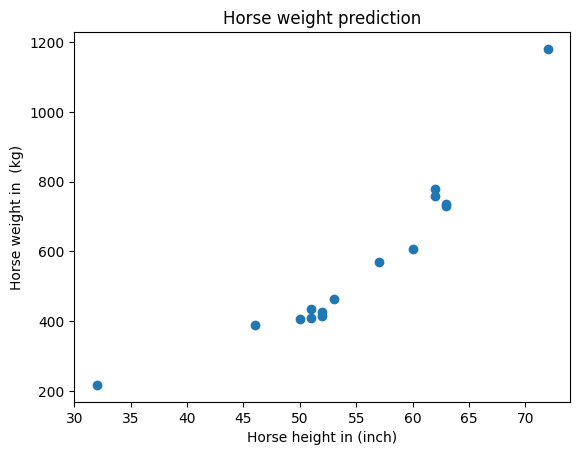

In [12]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_= ax.scatter(x1, y)

### our data certainly not clean one everything is all over the place let's see the power of Horse_weight The Moore-Penrose Pseudoinverse

In the material that I'm learning from says that we need another matrix without it line would pass through origin (0, 0) so let's add that.

In [16]:
x0 = np.ones(15) # here we create 15 1's that equals to data points we have
x0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

concatenate x0 and x1 into matrix X:

In [17]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[ 1., 51.],
        [ 1., 46.],
        [ 1., 63.],
        [ 1., 52.],
        [ 1., 72.],
        [ 1., 60.],
        [ 1., 50.],
        [ 1., 62.],
        [ 1., 62.],
        [ 1., 53.],
        [ 1., 57.],
        [ 1., 51.],
        [ 1., 32.],
        [ 1., 63.],
        [ 1., 52.]])

formula to calculate w is $ w = X^+y $:

In [20]:
w = np.dot(np.linalg.pinv(X), y)
w

matrix([[-718.70931113,   23.37244512]])

The first weight corresponds to the y-intercept of the line, which is typically denoted as b: 
this is bias and is constant when every other value of independent variables are (X = 0) y = b

In [41]:
b = np.asarray(w).reshape(-1)[0]
b

-718.7093111279335

And the second weight corresponds to the slope of the line, which is typically denoted as m:

we can them both in equation like $ y = mx + b $

In [42]:
m = np.asarray(w).reshape(-1)[1]
m

23.37244511733535

we can plot it to see how it fits the points:

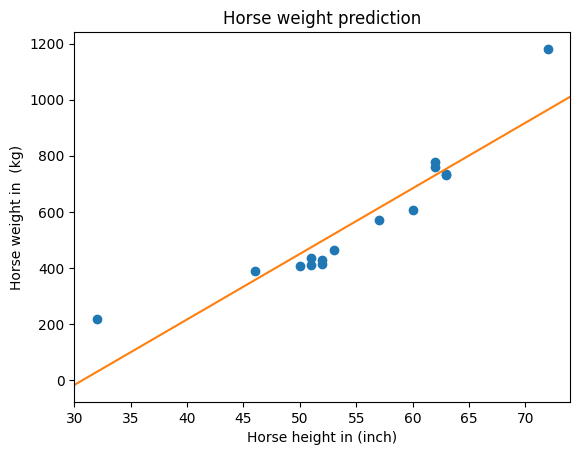

In [44]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_= ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')

and $ Xw = y $ let's check how accurate can our model predict

In [46]:
xtest = np.array([63, 62, 70, 54, 56, 39, 60, 57, 40, 59]) # x for testing data-set

In [47]:
ytest = np.array([782, 761, 1121, 487, 578, 275, 608, 500, 279, 653]) # y for testing data-set
ytest

array([ 782,  761, 1121,  487,  578,  275,  608,  500,  279,  653])

 Now let's see what we get from this 😐

In [48]:
x0 = np.ones(10) # again we create 10 ones

In [49]:
X = np.concatenate((np.matrix(x0).T, np.matrix(xtest).T), axis=1)
X

matrix([[ 1., 63.],
        [ 1., 62.],
        [ 1., 70.],
        [ 1., 54.],
        [ 1., 56.],
        [ 1., 39.],
        [ 1., 60.],
        [ 1., 57.],
        [ 1., 40.],
        [ 1., 59.]])

In [50]:
y_pred = np.dot(X, w.T)
y_pred

matrix([[753.75473126],
        [730.38228615],
        [917.36184709],
        [543.40272521],
        [590.14761544],
        [192.81604845],
        [683.63739591],
        [613.52006056],
        [216.18849357],
        [660.26495079]])

#### Oh I love it look at this it's predicting so accurate it should be about 70-80 % 15 data points are givng great results, with matrix inverse it was about 15-20 % accuracy compared to that this is great. 🙊🙉

### Let's plot it

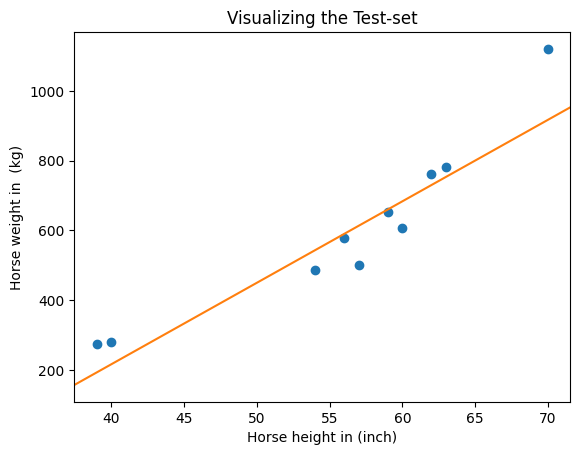

In [57]:
fig, ax = plt.subplots()

plt.title('Visualizing the Test-set')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(xtest, ytest)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_= ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')

###That is the end 